In [1]:
import ee

ee.Authenticate()
ee.Initialize()


Successfully saved authorization token.


In [2]:
print(ee.Image("NASA/NASADEM_HGT/001").get("title").getInfo())

NASADEM: NASA NASADEM Digital Elevation 30m


In [8]:
import io
import requests
import numpy

region = ee.Geometry.Polygon(
    [
        [
            [-103.1913812014911,20.33034573665963],
            [-103.1922818923659,20.32761306717687],
            [-103.1880223393225,20.32661425447412],
            [-103.1883963909232,20.33111088627422],
            [-103.1913812014911,20.33034573665963]
        ]
    ]
)

col_filter = ee.Filter([ee.Filter.bounds(ee.Geometry.Point(-103.1913512014911,20.33033573665963)), ee.Filter.date('2021-04-02', '2021-04-03')]);


dwCol = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1').filter(col_filter)

array = dwCol.toArrayPerBand()

url = array.getDownloadURL({
    'bands': ['shrub_and_scrub'],
    'region': region,
    'scale': 20,
    'format': 'NPY'
})

response = requests.get(url)
print(url)

if response.status_code == 200:
    data = numpy.load(io.BytesIO(response.content))
    print(data)
    print(data.dtype)
else:
    print("nu")

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/2be6c3ec4bfb1dfa9bdc746a2c47ad2e-159af06ab4efadc3603849559a9b14aa:getPixels
nu


In [32]:
url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/f403c92996c71f8336da1f1edc646605-1992d64d9feef6a55e5fe2151ddc2e84:getPixels'

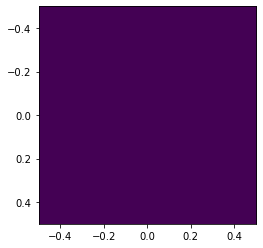

In [28]:
import geemap

array = dwCol.toArrayPerBand()

img = geemap.ee_to_numpy(array,['water'],region)

import matplotlib.pyplot as plt

plt.imshow(img)

In [8]:
import geemap

img = array.getArray('water')

geemap.ee_to_numpy(img)


<class 'ee.Array'>


In [38]:
last

TypeError: Image data of dtype object cannot be converted to float

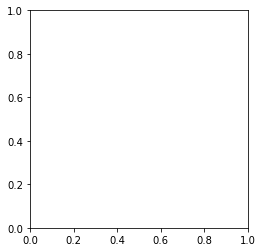

In [36]:
import matplotlib.pyplot as plt
plt.imshow(img.toList())